<a href="https://colab.research.google.com/github/neworldemancer/DSF5/blob/master/Course_1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to machine learning & Data Analysis

Basic introduction on how to perform typical machine learning tasks with Python.

Prepared by Mykhailo Vladymyrov & Aris Marcolongo,
Data Science Lab, University Of Bern, 2023

This work is licensed under <a href="https://creativecommons.org/share-your-work/public-domain/cc0/">CC0</a>.

# Part 1: Introduction and Supervised Machine Learning

# What is Machine Learning?

## Why Machine Learning?



1.   Forecasting
2.   
3.  





## Learning from data

Unlike classical algorithms, created by a human to analyze some data:

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_1.png" width="60%"/>

in machine learning the data itself is used for to define the algorithm:

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_2.png" width="60%"/>


The boundaries are sometimes a bit fuzzy between classical and machine learning algorithm.

In fact when we create algorithms, the problem in hand (namely the data  related to the problem), drives us to choose one or another algorithm. And we then tune it, to perform well on a task in hand.

There are three macro-areas of ML algorithms:

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_4.png" width="60%"/>

In this course we will explore the foundations of the first two macro-areas, the ones most often used in applications.

Recent examples.

1. Hugginface https://github.com/huggingface/transformers and ChatGPT https://chat.openai.com/ from openAI unleashed the power of transformer architectures https://arxiv.org/abs/1706.03762.

2. Segment anything https://github.com/facebookresearch/segment-anything

<img src="https://raw.githubusercontent.com/facebookresearch/segment-anything/main/assets/masks2.jpg" width="40%"/>

3. Mediapipe https://mediapipe-studio.webapps.google.com/home

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_5.png" width="40%"/>

All these applications would have been impossible without using enormous amounts of data.

## Supervised Learning: Classification vs Regression.

The two main tasks handled by (supervised) ML is regression and classification.

In regression we aim at modeling the relationship between the system's response (dependent variable) and one or more explanatory variables (independent variables), acquiring a continuum of values.

Examples of regression would be predicting the temperature for each day of the year, or expenses of the household as a function of the number of children and adults.

In classification the aim is to identify what class does a data-point belong to. For example, the species or the iris plant based on the size of its petals, or whether an email is spam or not based on its content.

Note 2025-09-23: The temperatrure example could also be framed into a classification prolem: E.g., Do persons feel warm or not?

## Performance measures (model evaluation and training)

Performance measures evaluate how much the model reflects the dataset, and differ according to the task (Regression/classification), and to the application. Here are the most popular:


### 1. Regression

Let $\hat y(x_i)$ be the prediction for input $x_i$, $y_i$ the true value, and $\bar y=\frac{1}{n}\sum_i y_i$ the mean. (note 2025-09-23: Metrics)

- **Mean Square Error (MSE):**
  $$\mathrm{MSE} = \frac{1}{n} \sum_i (y_i - \hat y(x_i))^2$$
- **Root Mean Square Error (RMSE):**
  $$\mathrm{RMSE} = \sqrt{\frac{1}{n} \sum_i (y_i - \hat y(x_i))^2}$$
- **Mean Absolute Error (MAE):**
  $$\mathrm{MAE} = \frac{1}{n} \sum_i |y_i - \hat y(x_i)|$$
- **Explained Variance ($R^2$):**
  $$R^2 = 1 - \frac{\sum_i (y_i - \hat y(x_i))^2}{\sum_i (y_i - \bar y)^2}$$

---

### 2. Classification

The confusion matrix and related metrics are the workhorses for classification. We distinguish binary and multiclass cases:

#### **Binary Case**

|            | Predicted 0 (Negative) | Predicted 1 (Positive) |
|------------|------------------------|------------------------|
| **True (Exact) 0** | TN (True Negative)     | FP (False Positive)    |
| **True (Exact) 1** | FN (False Negative)    | TP (True Positive)     |

(class 0 is the negative one, class 1 the positive)

- **Accuracy:**
  $$\mathrm{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}$$
- **Precision:**
  $$\mathrm{Precision} = \frac{TP}{TP + FP}$$
  ( For every time that I detected class 1, how many times was I correct? )
- **Recall:**
  $$\mathrm{Recall} = \frac{TP}{TP + FN}$$
  ( Among all possible samples with class 1, how many was I able to detect? )

---

#### **Multiclass Case**

The confusion matrix is a $K \times K$ table ($K$ = number of classes):

|        | Pred 0 | Pred 1 | Pred 2 | Pred 3 | Pred 4 |
|--------|--------|--------|--------|--------|--------|
| True (Exact) 0 | $a_{00}$ | $a_{01}$ | $a_{02}$ | $a_{03}$ | $a_{04}$ |
| True (Exact) 1 | $a_{10}$ | $a_{11}$ | $a_{12}$ | $a_{13}$ | $a_{14}$ |
| True (Exact) 2 | $a_{20}$ | $a_{21}$ | $a_{22}$ | $a_{23}$ | $a_{24}$ |
| True (Exact) 3 | $a_{30}$ | $a_{31}$ | $a_{32}$ | $a_{33}$ | $a_{34}$ |
| True (Exact) 4 | $a_{40}$ | $a_{41}$ | $a_{42}$ | $a_{43}$ | $a_{44}$ |

- **Accuracy:**
  $$\mathrm{Accuracy} = \frac{\sum_{i=1}^K a_{ii}}{\sum_{i,j=1}^K a_{ij}}$$
- **Precision, Recall:**
  We can define precision and recall *per class*. Try to answer the questions: ( *For every time that I detected class xxx, how many times was I correct?* , and *Among all possible samples with class xxx, how many was I able to detect?* )



A similarity measure between the model and the true dataset is needed both for:

- **training/fitting a model (loss function)**
- **performance evaluation (metrics)**.

For training, usually **differentiable loss functions** are employed, which can be minimized via gradient descent. For regression tasks, common choices are the Mean Square Error (MSE) or the Mean Absolute Error (MAE). For classification tasks, cross-entropy loss is often used.

## Actual aim: Generalization

In supervised machine learning we distinguish two faces: `training` and `testing`. To measure model performance in an unbiased way, we need to use different data to test the model than the data that the model was trained on.

Therefore we often use the 'train-test' split: e.g. 20% of all available dataset is reserved for model performance test, and the remaining 80% is used for actual model training (these percentages may vary).

CAVEAT: When the test set contains information about the training set that can spoil the resulting metrics we talk about `data leakage` or `information leakage`.

### Optimizing generalization error:

To understand the origins of poor generalization we need to identify two source of errors: bias and variance. In order to understand this concept we perform a thought experiment. Suppose we use N examples to fit our model, and get a prediction $f_1(x)$. Now we choose other N examples and get another prediction $f_2(x)$ for the same sample. We can follow this procedure many times collecting $f_i(x),i=1...N_{trials}$.

The **variance** of the model is the spread of $f_i(x), i=1...N_{trials}$, saying how much the predictions are stable.

The **bias** of the model compares the mean value of $f_i(x), i=1...N_{trials}$ w.r.t to the real value $f(x$)$.

The total error has a bias and a variance component. (note 2025-09: figure is not displayed in Colab => open in GitHub for example)

<table>
  <tr>
    <td>
      <img src="https://github.com/neworldemancer/DSF5/raw/master/figures/Bias_variance_1.png" width="100%">
    </td>
    <td>
        
**Dictionary of terms**

**variance:** suppose the model is trained again with different, but same number of examples. What would be the spread of the predictions on the test set?
<br><br>

**bias**: suppose the model is trained again with different, but same number of examples. How would the mean of these predictions differ from the real value?
<br><br>

**model capacity**: models with low capacity can fit just simple mappings (e.g. linear models)
<br><br>

**overfitting**: model is too complex and learns pattern leading to a very small training set error --> generalization error can be reduced.
<br><br>

**underfitting**: model is too simple w.r.t. the patterns that can be extracted from the data --> generalization error can be reduced.
<br><br>

  </tr>
</table>

Let's see these concept in a one dimensional example:

In [3]:
import os
import tensorflow as tf
import tarfile
import os
from packaging import version
import shutil
import sys


def download_and_extract_data(
    url="https://github.com/neworldemancer/DSF5/raw/master/colab_material.tgz",
    target_dir="data",
    fname="colab_material.tgz",
    update_folder=False
):
    """Download and extract a tar.gz dataset into target_dir."""

    if update_folder and os.path.exists(target_dir):
        shutil.rmtree(target_dir)

    if not os.path.exists(target_dir):
        cache_dir = os.path.abspath(".")

        if version.parse(tf.__version__) >= version.parse("2.13.0"):
            # new behavior: fname must be only a filename
            path = tf.keras.utils.get_file(
                fname=fname,
                origin=url,
                cache_dir=cache_dir
            )
        else:
            # old behavior: can pass full path
            path = tf.keras.utils.get_file(
                fname=os.path.join(cache_dir, fname),
                origin=url
            )
        # extract tar into target_dir
        with tarfile.open(path, "r:gz") as tar:
            tar.extractall(target_dir)
    else:
        print('Data already present. Use update_folder = True to overwrite/update if desired.')
    return os.path.abspath(target_dir)

data_path = download_and_extract_data(update_folder=False)
sys.path.append(data_path)
print("Data available at:", data_path)

import utils.routines as routines

2256996/2256996 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data available at: /content/data


/tmp/ipython-input-3674676285.py:39: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(target_dir)


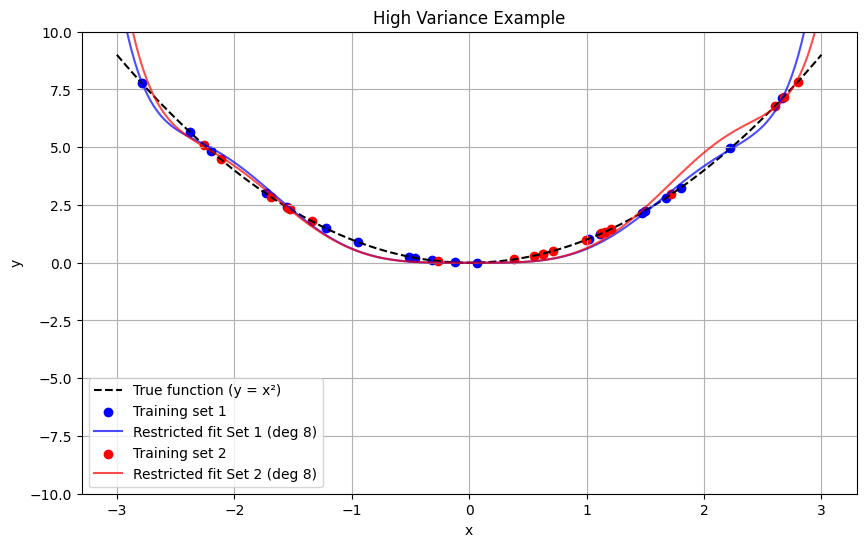

In [4]:
#routines.plot_variance_example(num_points=5, seed=216)
routines.plot_variance_example(num_points=20, seed=216)

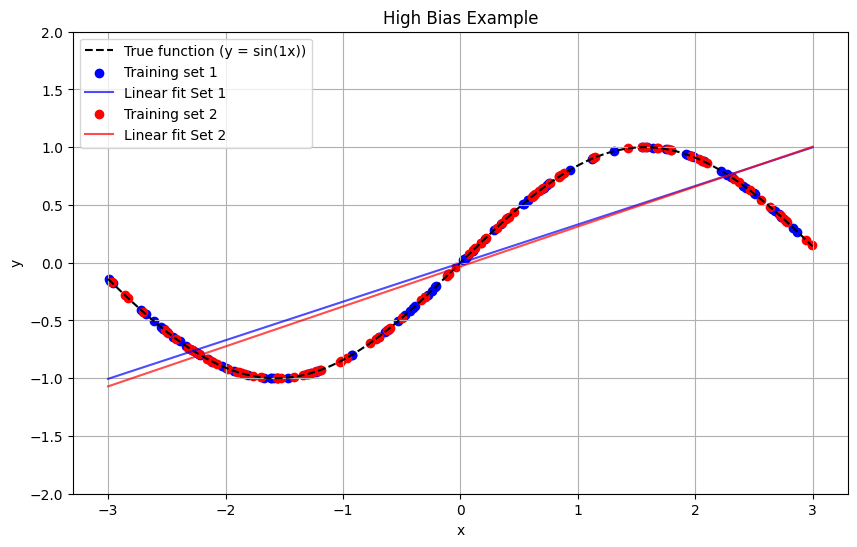

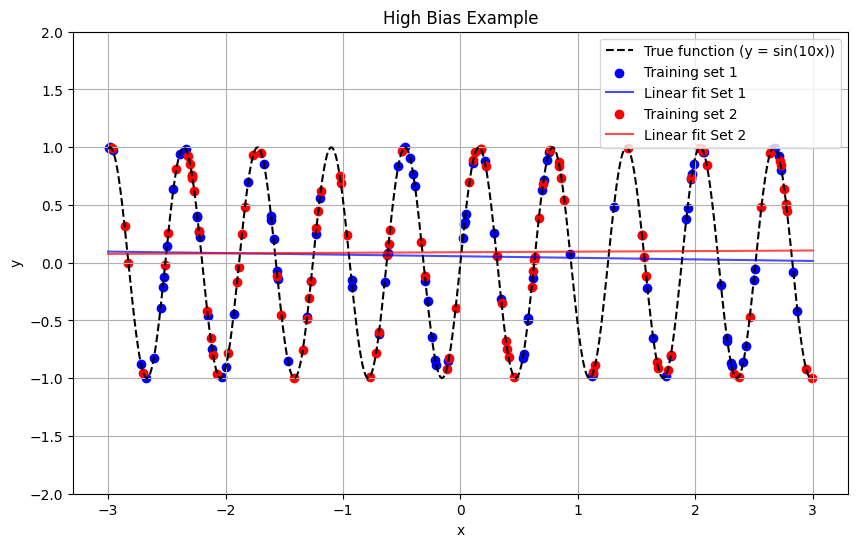

In [6]:
#routines.plot_bias_example(num_points=5, frequency=1, seed=23)
routines.plot_bias_example(num_points=100, frequency=1, seed=23)
routines.plot_bias_example(num_points=100, frequency=10, seed=23)

The total error depends both on bias and variance, that therefore must be balanced.

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/Bias_variance_2.png" width="60%"/>

Optimizing capacity is one of the reasons for which we have a pletora of methods in supervised machine learning. If we recognize the origin of the error (bias or variance) we may choose properly what model to try out next!

### Extensions to simple train-test splitting :

### Cross validation:

For small datasets the estimate on the test error may be unstable. A possible solution is using cross-validation.

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/cv.png" width="60%"/>

### Train-Val-Test split:

When selecting the best model it is natural to apply the previous procedure several times and choose the one minimizing the test error.

This is OK but when reporting the final model performance (e.g. MSE) this may lead to a biased estimate, since the test set has been used when choosing the model and therefore the performance measure will not be independent of the data used to train it.

That is why in such scenarios we hold-out the test set, and use a validation set to perform model selection.


<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/train_val_test.png" width="60%"/>

# Load libraries

In [4]:
# Scikit-learn (formerly scikits.learn and also known as sklearn) is a free
# software machine learning library for the Python programming language.
# It features various classification, regression and clustering algorithms,
# and is designed to interoperate with the Python numerical and scientific
# libraries NumPy and SciPy. (from wiki)

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance

# common visualization module
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

# numeric library
import numpy as np

import os
import pandas as pd
from time import time as timer
import tarfile

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

import utils.routines as routines

We need the function download_and_extract_data if the notebook is run on Colab:

# Datasets

In this course we will use several synthetic and real-world datasets to illustrate the behavior of the models and exercise our skills.

## 1. Synthetic linear

In [3]:
def get_linear(n_d=1, n_points=10, w=None, b=None, sigma=5):
  x = np.random.uniform(0, 10, size=(n_points, n_d))

  w = w or np.random.uniform(0.1, 10, n_d)
  b = b or np.random.uniform(-10, 10)
  y = np.dot(x, w) + b + np.random.normal(0, sigma, size=n_points)

  print('true slopes: w =', w, ';  b =', b)

  return x, y

true slopes: w = [6.30468319] ;  b = -6.490065582889346


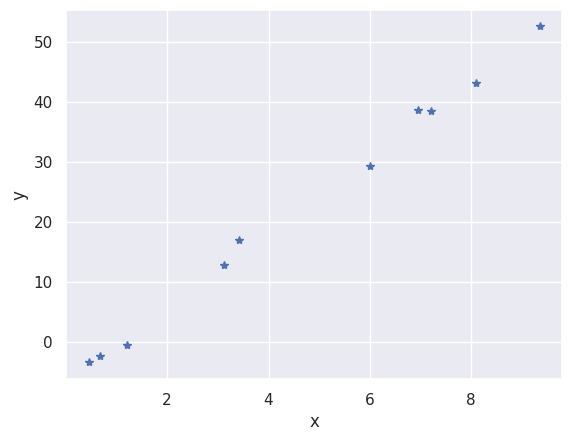

In [9]:
x, y = get_linear(n_d=1, sigma=1)
plt.plot(x[:, 0], y, '*')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

true slopes: w = [6.41496992 6.49464812] ;  b = -6.340225156101562


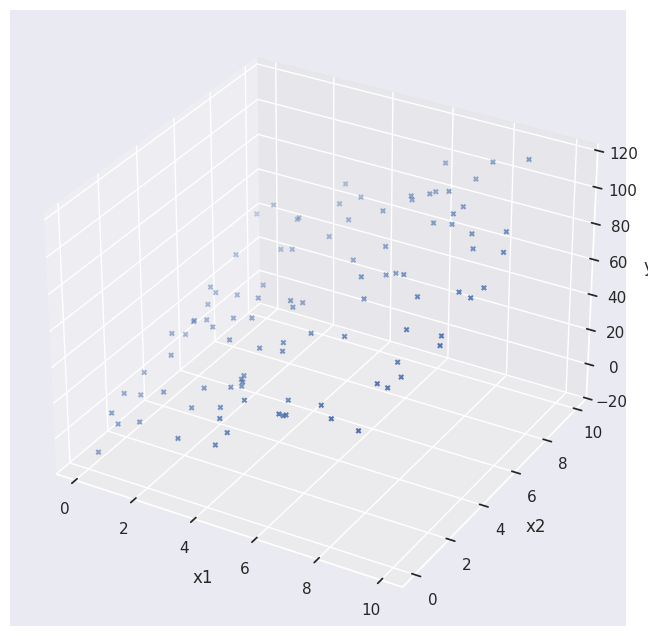

In [10]:
n_d = 2
x, y = get_linear(n_d=n_d, n_points=100)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, marker='x', color='b',s=10)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

## 2. House prices

Subset of the Ames Houses dataset: http://jse.amstat.org/v19n3/decock.pdf

In [4]:
def house_prices_dataset(return_df=False, return_df_xy=False, price_max=400000, area_max=40000, data_path='/content/data'):
  path = os.path.join(data_path, 'data/AmesHousing.csv')

  df = pd.read_csv(path, na_values=('NaN', ''), keep_default_na=False,  )

  rename_dict = {k:k.replace(' ', '').replace('/', '') for k in df.keys()}
  df.rename(columns=rename_dict, inplace=True)

  useful_fields = ['LotArea',
                  'Utilities', 'OverallQual', 'OverallCond',
                  'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond',
                  'HeatingQC', 'CentralAir', 'Electrical',
                  '1stFlrSF', '2ndFlrSF','GrLivArea',
                  'FullBath', 'HalfBath',
                  'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
                  'Functional','PoolArea',
                  'YrSold', 'MoSold'
                  ]
  target_field = 'SalePrice'

  df.dropna(axis=0, subset=useful_fields+[target_field], inplace=True)

  cleanup_nums = {'Street':      {'Grvl': 0, 'Pave': 1},
                  'LotFrontage': {'NA':0},
                  'Alley':       {'NA':0, 'Grvl': 1, 'Pave': 2},
                  'LotShape':    {'IR3':0, 'IR2': 1, 'IR1': 2, 'Reg':3},
                  'Utilities':   {'ELO':0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3},
                  'LandSlope':   {'Sev':0, 'Mod': 1, 'Gtl': 3},
                  'ExterQual':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'ExterCond':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'BsmtQual':    {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'BsmtCond':    {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'BsmtExposure':{'NA':0, 'No':1, 'Mn': 2, 'Av': 3, 'Gd': 4},
                  'BsmtFinType1':{'NA':0, 'Unf':1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ':5, 'GLQ':6},
                  'BsmtFinType2':{'NA':0, 'Unf':1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ':5, 'GLQ':6},
                  'HeatingQC':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'CentralAir':  {'N':0, 'Y': 1},
                  'Electrical':  {'':0, 'NA':0, 'Mix':1, 'FuseP':2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
                  'KitchenQual': {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'Functional':  {'Sal':0, 'Sev':1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2':5, 'Min1':6, 'Typ':7},
                  'FireplaceQu': {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'PoolQC':      {'NA':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'Fence':       {'NA':0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv':4},
                  }

  df_X = df[useful_fields].copy()
  df_X.replace(cleanup_nums, inplace=True)  # convert continous categorial variables to numerical
  df_Y = df[target_field].copy()

  x = df_X.to_numpy().astype(np.float32)
  y = df_Y.to_numpy().astype(np.float32)

  if price_max>0:
    idxs = y<price_max
    x = x[idxs]
    y = y[idxs]

  if area_max>0:
    idxs = x[:,0]<area_max
    x = x[idxs]
    y = y[idxs]

  return (x, y, df) if return_df else ((x, y, (df_X, df_Y)) if return_df_xy else (x,y))

In [5]:
x, y, df = house_prices_dataset(return_df=True)
print(x.shape, y.shape)
df.head()

(2847, 24) (2847,)


/tmp/ipython-input-3162510123.py:47: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_X.replace(cleanup_nums, inplace=True)  # convert continous categorial variables to numerical


,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NA,IR1,Lvl,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900


In [13]:
df.describe()

,Order,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2929.000000,2.929000e+03,2929.000000,2439.000000,2929.00000,2929.000000,2929.000000,2929.000000,2929.000000,2906.000000,...,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000
mean,1465.461591,7.143956e+08,57.379652,69.223042,10148.06282,6.095254,5.563332,1971.344486,1984.258791,101.931865,...,93.749744,47.549676,23.019461,2.593377,16.007511,2.244111,50.652441,6.216456,2007.790372,180800.599522
std,846.104363,1.887262e+08,42.643257,23.370001,7881.35958,1.411122,1.111678,30.243747,20.859616,179.133457,...,126.383085,67.489204,64.148601,25.145578,56.096167,35.603235,566.440219,2.714863,1.316832,79899.955086
min,1.000000,5.263011e+08,20.000000,21.000000,1300.00000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.000000,5.284770e+08,20.000000,58.000000,7440.00000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.000000,5.354532e+08,50.000000,68.000000,9434.00000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2198.000000,9.071811e+08,70.000000,80.000000,11556.00000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.00000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


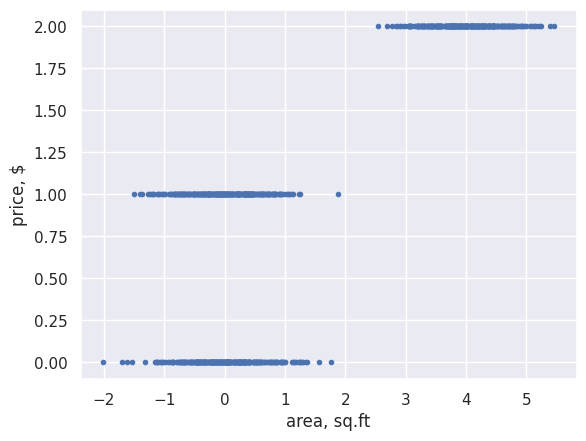

In [31]:
plt.plot(x[:, 0], y, '.')
plt.xlabel('area, sq.ft')
plt.ylabel('price, $');
plt.show()

## 3. Blobs

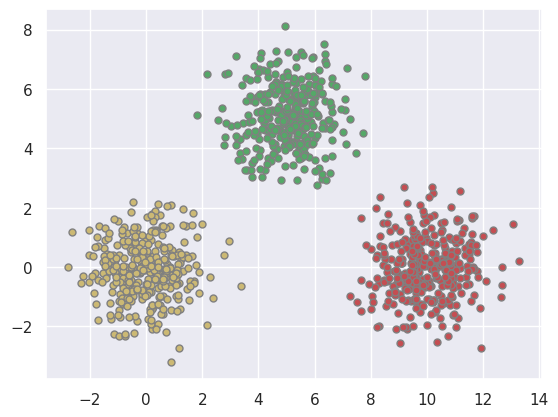

In [15]:
x, y = make_blobs(n_samples=1000, centers=[[0,0], [5,5], [10, 0]])
colors = "ygr"
for i, color in enumerate(colors):
    idx = y == i
    plt.scatter(x[idx, 0], x[idx, 1], c=color, edgecolor='gray', s=25)
plt.show()

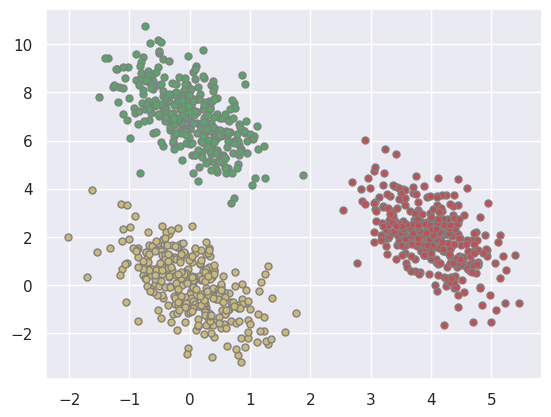

In [16]:
x, y = make_blobs(n_samples=1000, centers=[[0,0], [5,5], [10, 0]])

transformation = [[0.4, 0.2], [-0.4, 1.2]]  # affine transformation matrix
x = np.dot(x, transformation)               # applied to point coordinated to make blobs less separable

colors = "ygr"
for i, color in enumerate(colors):
    idx = y == i
    plt.scatter(x[idx, 0], x[idx, 1], c=color, edgecolor='gray', s=25)
plt.show()



## 4. MNIST

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting (taken from http://yann.lecun.com/exdb/mnist/). Each example is a 28x28 grayscale image and the dataset can be readily downloaded from Tensorflow.

In [17]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Let's check few samples:

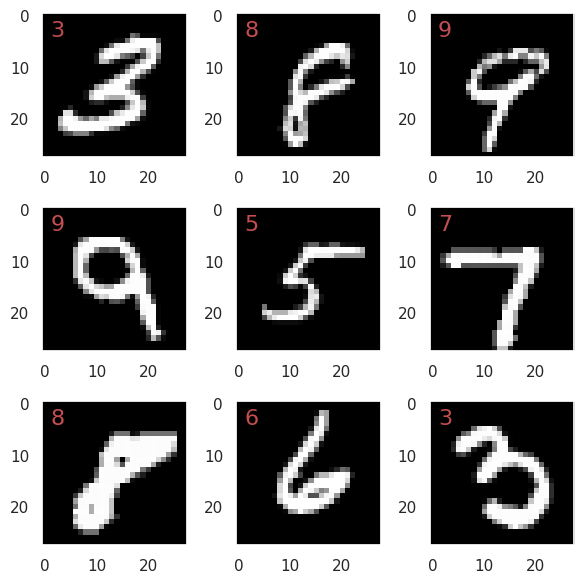

In [18]:
n = 3
fig, ax = plt.subplots(n, n, figsize=(2*n, 2*n))
ax = [ax_xy for ax_y in ax for ax_xy in ax_y]
for axi, im_idx in zip(ax, np.random.choice(len(train_images), n**2)):
  im = train_images[im_idx]
  im_class = train_labels[im_idx]
  axi.imshow(im, cmap='gray')
  axi.text(1, 4, f'{im_class}', color='r', size=16)
  axi.grid(False)
plt.tight_layout()
plt.show()

## 5. Fashion MNIST

`Fashion-MNIST` is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. (from https://github.com/zalandoresearch/fashion-mnist)

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
train_images.shape

(60000, 28, 28)

In [11]:
train_images[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

Let's check few samples:

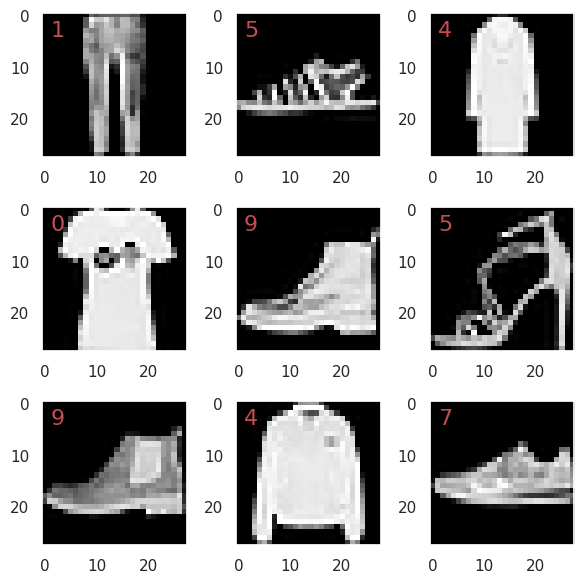

In [12]:
n = 3
fig, ax = plt.subplots(n, n, figsize=(2*n, 2*n))
ax = [ax_xy for ax_y in ax for ax_xy in ax_y]
for axi, im_idx in zip(ax, np.random.choice(len(train_images), n**2)):
  im = train_images[im_idx]
  im_class = train_labels[im_idx]
  axi.imshow(im, cmap='gray')
  axi.text(1, 4, f'{im_class}', color='r', size=16)
  axi.grid(False)
plt.tight_layout()
plt.show()

In [15]:
train_labels.shape

(60000,)

In [13]:
fmnist_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Each of the training and test examples is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

# `scikit-learn` interface

In this course we will primarily use the `scikit-learn` module.
You can find extensive documentation with examples in the [user guide](https://scikit-learn.org/stable/user_guide.html)

The module contains A LOT of different machine learning methods, and here we will cover only few of them. What is great about `scikit-learn` is that it has a uniform and consistent interface.

All the different ML approaches are implemented as classes with a set of same main methods:

1. `fitter = ...`: Create fitter object.
2. `fitter.fit(x, y[, sample_weight])`: Fit model to predict from list of smaples `x` a list of target values `y`.
3. `y_pred = fitter.predict(X)`: Predict using the trained model.
4. `s = fitter.score(x, y[, sample_weight])`: Obtain a relevant performance measure of the trained model.

This allows one to easily replace one approach with another and find the best one for the problem at hand, by simply using a regression/classification object of another class, while the rest of the code can remain the same.


It is useful to know that generally in scikit-learn the input data is represented as a matrix $X$ of dimensions `n_samples x n_features` (also called the `design matrix`), whereas the supervised labels/values are stored in a matrix $Y$ of dimensions `n_samples x n_target` .

# 1.Linear models

In many cases the scalar value of interest - dependent variable - is (or can be approximated as) linear combination of the independent variables.

In linear regression the estimator is searched in the form: $$\hat{y}(\bar{x} | w_0,\bar{w}) = w_0 + w_1 x_1 + ... + w_p x_p$$

The parameters $\bar{w} = (w_1,..., w_p)$ and $w_0$ are designated as `coef_` and `intercept_` in `sklearn`.

Reference: https://scikit-learn.org/stable/modules/linear_model.html

## 1. Linear regression

[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) fits a linear model with coefficients $\bar{w} = (w_1,..., w_p)$ and $w_0$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Mathematically it solves a problem of the form:  $$(w^{opt}_0,\bar{w}^{opt}) = \arg min_{w_0,\bar{w}} \sum_i \left(\hat{y}(\bar{x_i} | w_0,\bar{w})-y_i\right)^2$$

The function:

$$L(w,\bar{w}) \equiv \sum_i \left(\hat{y}(\bar{x_i} | w_0,\bar{w})-y_i\right)^2$$

is called the `loss function` for linear regression and we say that during training/fitting the loss function is `minimized`.

In terms of the design matrix $X_{i,p}$, where $i$ ranges over the number of samples and $p$ across the number of features:

$$L(w,\bar{w})=\sum_i \left((w_0 + \sum_p X_{i,p}w_p)-y_i\right)^2$$

This makes it explicit that the function to minimize is quadratic in $w$ and an analytical solution is therefore available (no numerical optimization).

true slopes: w = [3.23556948] ;  b = 6.131059517583207


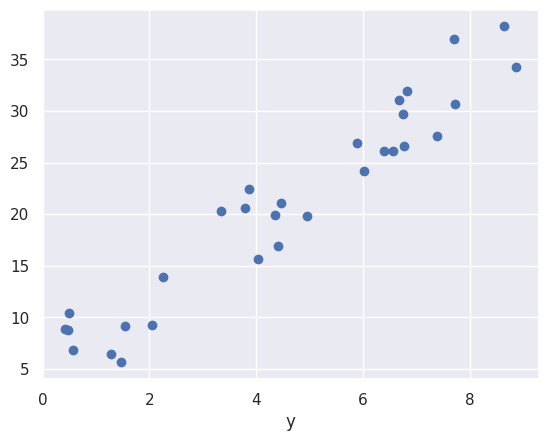

In [45]:
x, y = get_linear(n_d=1, sigma=3, n_points=30)  # p==1, 1D input
plt.scatter(x, y);
plt.xlabel('x')
plt.xlabel('y')
plt.show()

In [46]:
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression()

In [47]:
w, w0 = reg.coef_, reg.intercept_
print(w, w0)

[3.51033864] 4.957694495449147


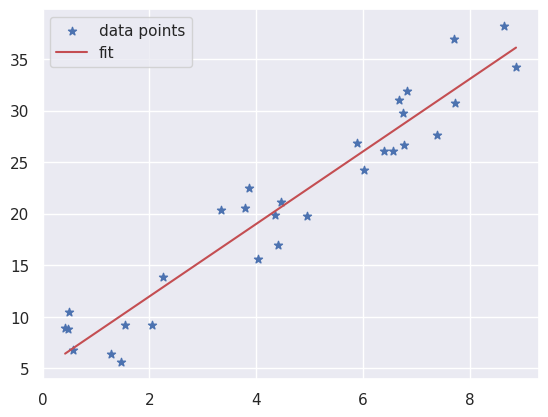

In [48]:
plt.scatter(x, y, marker='*', label='data points')
x_f = np.linspace(x.min(), x.max(), 10)
y_f = w0 + w[0] * x_f
plt.plot(x_f, y_f, label='fit', c='r')
plt.legend()
plt.show()

In [ ]:
# mse
print(np.mean( (y - reg.predict(x)) **2 ), metrics.mean_squared_error(y, reg.predict(x)))

# rmse
print(np.sqrt(np.mean( (y - reg.predict(x)) **2 )), np.sqrt(metrics.mean_squared_error(y, reg.predict(x))))

2.497232502883822

In [ ]:
# R2
reg.score(x, y)

0.9908422967893132

Let's try 2D input.
Additionally, here we will split the whole dataset into training and test subsets using the `train_test_split` function:

true slopes: w = [0.67883393 4.35500875] ;  b = 8.513598634940465


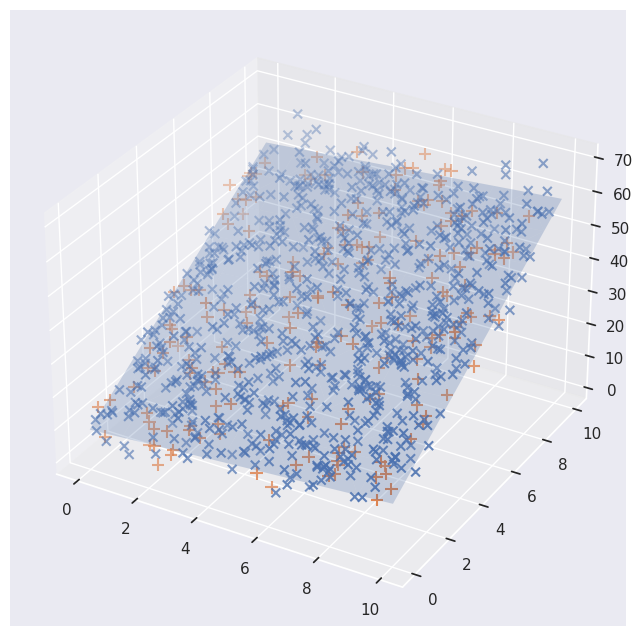

In [ ]:
n_d = 2
x, y = get_linear(n_d=n_d, n_points=1000, sigma=5)

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train, marker='x', s=40)
ax.scatter(x_test[:,0], x_test[:,1], y_test, marker='+', s=80)

xx0 = np.linspace(x[:,0].min(), x[:,0].max(), 10)
xx1 = np.linspace(x[:,1].min(), x[:,1].max(), 10)
xx0, xx1 = [a.flatten() for a in np.meshgrid(xx0, xx1)]
xx = np.stack((xx0, xx1), axis=-1)
yy = reg.predict(xx)
ax.plot_trisurf(xx0, xx1, yy, alpha=0.25, linewidth=0)
plt.show()

In [ ]:
# rmse

print('train rmse =', np.sqrt( np.mean( (y_train - reg.predict(x_train))**2 ) ) )
print('test rmse =', np.sqrt( np.mean( (y_test - reg.predict(x_test))**2  ) ) )

train mse = 4.855019304188908
test mse = 4.894898168849628


In [ ]:
# R2
print('train R2 =', reg.score(x_train, y_train))
print('test R2 =', reg.score(x_test, y_test))

## EXERCISE 1. Linear Regression for AMES

In this exercise we will inspect a regression model. We will build a trivial baseline over which to compare, and plot exact values vs predicted.

Having a trivial baselines is often of paramout importance, especially in more complex settings, because it helps to decide if the model has any predictive power at all.

/tmp/ipython-input-3162510123.py:47: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_X.replace(cleanup_nums, inplace=True)  # convert continous categorial variables to numerical


(2847, 24) (2847,)
rmse = 65971.41
rmse = 65971.41


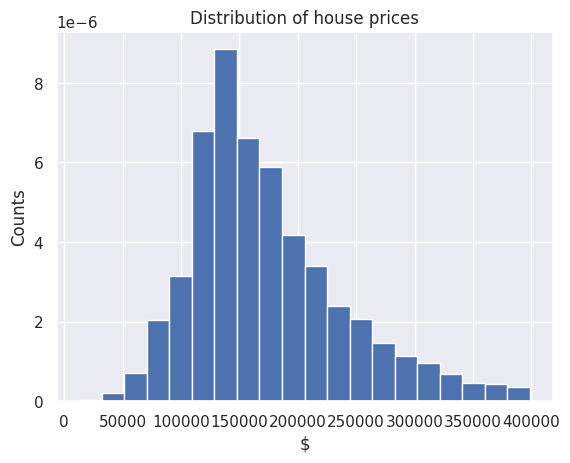

In [6]:
# WARM-UP: built a baseline

x, y = house_prices_dataset()
print(x.shape,y.shape)
_ = plt.hist(y, bins=20, density=True)
plt.title('Distribution of house prices')
plt.xlabel('$')
plt.ylabel('Counts')

baseline = np.mean(y)
residuals = y - baseline
print('rmse =', np.std(residuals))
print('rmse =', np.sqrt( np.mean(residuals**2)   ) )


Use linear regression to fit house prices dataset.

train rmse = 34081.12
test rmse = 32623.475
train mae = 23942.576
test mae = 23713.14
train R2 = 0.7349452972412109
test R2 = 0.7485413551330566


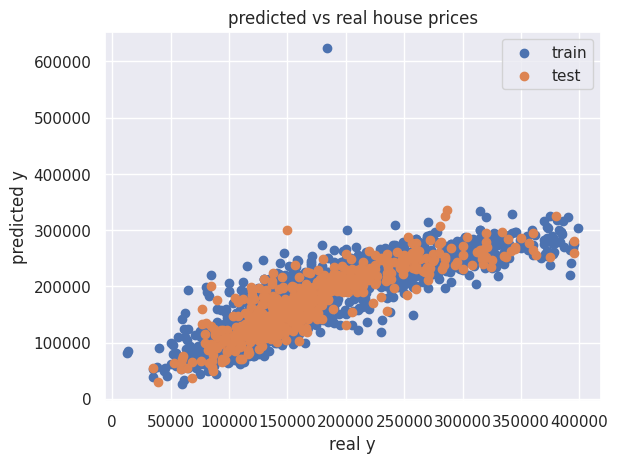

In [19]:
# 1. make train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 2. fit the model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

# 3. evaluate RMSE, MAE and R2 on train and test datasets
print('train rmse =', np.sqrt( np.mean( (y_train - reg.predict(x_train))**2 ) ) )
print('test rmse =', np.sqrt( np.mean( (y_test - reg.predict(x_test))**2  ) ) )

print('train mae =', np.mean(np.abs(y_train - reg.predict(x_train))) )
print('test mae =', np.mean(np.abs(y_test - reg.predict(x_test))) )

print('train R2 =', reg.score(x_train, y_train))
print('test R2 =', reg.score(x_test, y_test))

# 4. plot y vs predicted y for test and train parts
plt.scatter(y_train, reg.predict(x_train), label='train')
plt.scatter(y_test, reg.predict(x_test), label='test')
plt.legend()
plt.title('predicted vs real house prices')
plt.xlabel('real y')
plt.ylabel('predicted y')
plt.show()

## 2. Logistic regression

## Logistic Regression: Binary Case

Logistic regression is a **linear model for classification**, not regression. Typical binary outputs include:
- {sold, not sold} (e.g., predicting if a product will be sold)
- {failed, passed} (e.g., predicting if a student will fail a class)

We map the two classes to targets $y_i \in \{0,1\}$, called the positive and negative class, respectively.

**Model:**
The probability $p$ of a point belonging to the positive class is modeled as:
$$p = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)$$
where the sigmoid function is:
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

The sigmoid maps the real-valued output of a linear function to $[0,1]$.

**Loss function:**
Parameters $w$ are trained to minimize:
$$L(w_0, \bar{w}) = -\sum_i y_i \log(p_i)$$

## Logistic Regression: More Classes

A **multiclass** model assigns each sample to one of several mutually exclusive classes (e.g., predicting treatment response: {negative, not significant, positive}).

To extend the binary model, we use **multinomial logistic regression**. This computes logits for each class and aggregates them using the softmax operator:

$$
\text{logits}_c = w_{c,0} + w_{c,1} x_1 + ... + w_{c,p} x_p
$$
$$
p_c = \text{softmax}(\text{logits})_c = \frac{e^{\text{logits}_c}}{\sum_{c'} e^{\text{logits}_{c'}}}
$$

Probabilities are normalized before training.

**Loss function:**
Parameters are trained to minimize:
$$
L(\{w_{0,c}\}, \{\bar{w}_c\}) = -\sum_i \left(\sum_c y_i^{OH}(c) \log p_{i,c}\right)
$$
where $y_i^{OH}(c) = 1$ if sample $i$ belongs to class $c$, $0$ otherwise (one-hot encoding).

This converts a multiclass label (e.g., $y_i \in \{cat, dog, other\}$) into binary labels: $y_i^{OH}(dog), y_i^{OH}(cat), y_i^{OH}(other) \in \{0,1\}$.

---
**Notes:**
- The choices here are based on probability theory and maximum likelihood.
- If classes are not exclusive (multilabel), fit individual binary models (one-vs-rest, `ovr`).

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-1792691474.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_0[idx], x_1[idx], c=color, cmap=plt.cm.Paired,


training accuracy : 0.995 (multinomial)


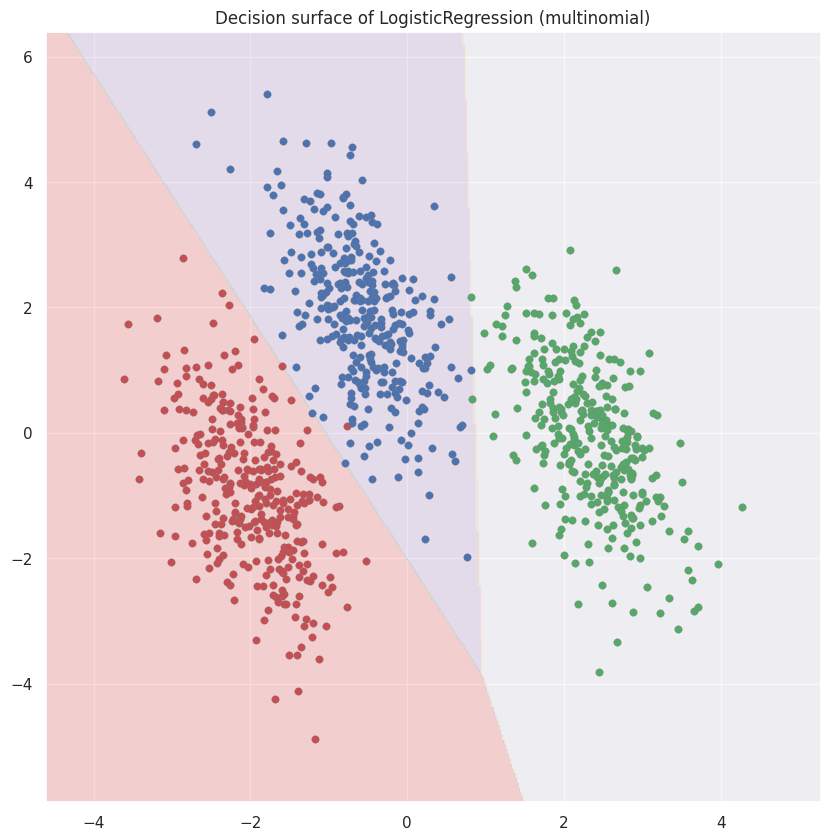

In [16]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
x, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
x = np.dot(x, transformation)

#for multi_class in ('multinomial', 'ovr'):
for multi_class in ['multinomial']:

    # do fit
    clf = linear_model.LogisticRegression(solver='sag', max_iter=100,
                             multi_class=multi_class, )
    clf.fit(x, y)

    # print the training scores
    print("training accuracy : %.3f (%s)" % (clf.score(x, y), multi_class))

    # get range for visualization
    x_0 = x[:, 0]
    x_1 = x[:, 1]
    x_min = x_0.min() - 1
    x_max = x_0.max() + 1
    y_min = x_1.min() - 1
    y_max = x_1.max() + 1

    plt.figure(figsize=(10,10))
    routines.plot_prediction_2d(x_min, x_max, y_min, y_max, classifier=clf)

    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = 'rbg'

    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(x_0[idx], x_1[idx], c=color, cmap=plt.cm.Paired,
                    edgecolor='gray', s=30, linewidth=0.2)

    # Plot the three one-against-all classifiers
    if multi_class=='ovr':
        coef = clf.coef_
        intercept = clf.intercept_
        def plot_hyperplane(c, color):
            def line(x0):
                return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
            plt.plot([x_min, x_max], [line(x_min), line(x_max)],
                    ls="--", color=color)
        for i, color in zip(clf.classes_, colors):
            plot_hyperplane(i, color)

    plt.show()



## EXERCISE 2. Logistic Regression for FMNIST

In this exercise we will inspect a multiclass classification model. We will extract some feature X for each sample, and use them to predict the label.

In [17]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [18]:
# This is a normalization step, which can help the training of some models. It does not hurt anyway

train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

Instead of using the raw images as input to the model (what would be the issue?) we perform a feature extraction step.

You can use the following function that takes the frequency content of the feature (power spectrum) as an example.

The process of trying out several features extracted from the data as input to a model is called *(manual) feature engineering*

In [19]:
#Helper function for point 2

def extract_features(images):
    """
    Extracts power spectrum features from a list or array of images.

    For each image, computes the 2D Fourier transform, calculates the power spectrum,
    normalizes it, and flattens the result into a 1D feature vector.

    Args:
        images (array-like): List or array of 2D image arrays.

    Returns:
        np.ndarray: Array of shape (num_images, num_features) containing the power spectrum features for each image.
    """
    def compute_power_spectrum(image):
        fourier_transform = np.fft.fft2(image)
        power_spectrum = np.abs(fourier_transform) ** 2
        power_spectrum /= np.sum(power_spectrum)
        return power_spectrum.flatten()
    power_spectrum_features = []
    for img in images:
        spectrum = compute_power_spectrum(img)
        power_spectrum_features.append(spectrum)
    return np.array(power_spectrum_features)

In [20]:
x_train = extract_features(train_images_norm)


In [27]:
[x_train.shape, train_images_norm.shape]

[(60000, 784), (60000, 28, 28)]

Now use a multinomial logistic regression classifier, and measure the accuracy, following the steps:

In [42]:
# 1. Create classifier
clf = linear_model.LogisticRegression(solver='sag', max_iter=100, multi_class='multinomial')

# 2. Extract Features, to be more robust against e.g. shift of object in the image (translation)
x_test = extract_features(test_images_norm)
x_train = extract_features(train_images_norm)


# 3. fit the model
clf.fit(x_train, train_labels)

# 4. evaluate accuracy on train and test datasets. Use for this the reg.score
print('train accuracy =', clf.score(x_train, train_labels))
print('test accuracy =', clf.score(x_test, test_labels))

# 5. evaluate the confusion matrix on the test set using, from sklearn import metrics the metrics.confusion_matrix method (check documentation)
cm = metrics.confusion_matrix(test_labels, clf.predict(x_test))
print(cm)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


train accuracy = 0.6734666666666667
test accuracy = 0.6679
[[678  11  83  96  37  15  59   3  11   7]
 [ 29 814  14 131   3   0   7   0   2   0]
 [ 71   1 711   9 119   6  69   0   9   5]
 [160  55  13 741  11   3  13   0   3   1]
 [165   3 371  74 295  18  60   0  11   3]
 [  3   1   3   1   0 793   2 132  12  53]
 [243   2 314  52 156  13 182   0  31   7]
 [  0   0   0   0   0  33   0 870  17  80]
 [  5   2  83  10   9  27   5  18 774  67]
 [ 40   0   4   8   4  16  13  71  23 821]]


In [31]:
x_test

array([[2.78417798e-01, 3.28573518e-02, 3.99921179e-03, ...,
        2.45869659e-03, 6.73903526e-04, 2.65859496e-02],
       [5.66689290e-01, 6.22091608e-02, 2.89428805e-02, ...,
        7.14509159e-04, 1.36665828e-03, 6.83553985e-04],
       [2.96481558e-01, 1.72381445e-01, 1.47054710e-02, ...,
        2.95127330e-03, 3.94746445e-03, 5.18525653e-03],
       ...,
       [2.54756628e-01, 1.09762539e-01, 1.93792420e-04, ...,
        2.61664113e-03, 3.09017788e-03, 3.39810704e-02],
       [2.47650242e-01, 1.88464060e-01, 7.34935364e-02, ...,
        2.08095998e-04, 1.40054468e-04, 1.81790939e-03],
       [2.98255446e-01, 3.22623776e-02, 7.46919469e-03, ...,
        2.30939405e-04, 7.96609803e-03, 1.94247787e-02]])

We can summarize the confusion matrix plotting precision and recall for each category. Given the confusion matrix you can use the following funtion:

In [43]:
# Helper function for point 6

def get_class_specific_prec_recall(cm):
    """
    Given a confusion matrix cm, computes precision and recall for each class.

    Precision for class i: cm[i, i] / sum of column i (true positives / predicted positives)
    Recall for class i: cm[i, i] / sum of row i (true positives / actual positives)

    Args:
        cm (np.ndarray): Confusion matrix of shape (n_classes, n_classes)

    Returns:
        precisions (list): Precision for each class
        recalls (list): Recall for each class
    """
    n_cat = cm.shape[0]
    precisions = []
    recalls = []
    # precision
    for i in range(n_cat):
        precisions.append(cm[i, i] / np.sum(cm[:, i]))

    # recall
    for i in range(n_cat):
        recalls.append(cm[i, i] / np.sum(cm[i, :]))
    return precisions, recalls


In [44]:
# 6 (optional). Inspect the confusion metrics, compute using matrix manipulations the precision and recall for each category and make a plot where on the x axes you have the categories and on the y axes precision and recall.
get_class_specific_prec_recall(cm)

([np.float64(0.48637015781922527),
  np.float64(0.9156355455568054),
  np.float64(0.44548872180451127),
  np.float64(0.660427807486631),
  np.float64(0.46529968454258674),
  np.float64(0.8582251082251082),
  np.float64(0.44390243902439025),
  np.float64(0.7952468007312614),
  np.float64(0.8667413213885778),
  np.float64(0.7863984674329502)],
 [np.float64(0.678),
  np.float64(0.814),
  np.float64(0.711),
  np.float64(0.741),
  np.float64(0.295),
  np.float64(0.793),
  np.float64(0.182),
  np.float64(0.87),
  np.float64(0.774),
  np.float64(0.821)])

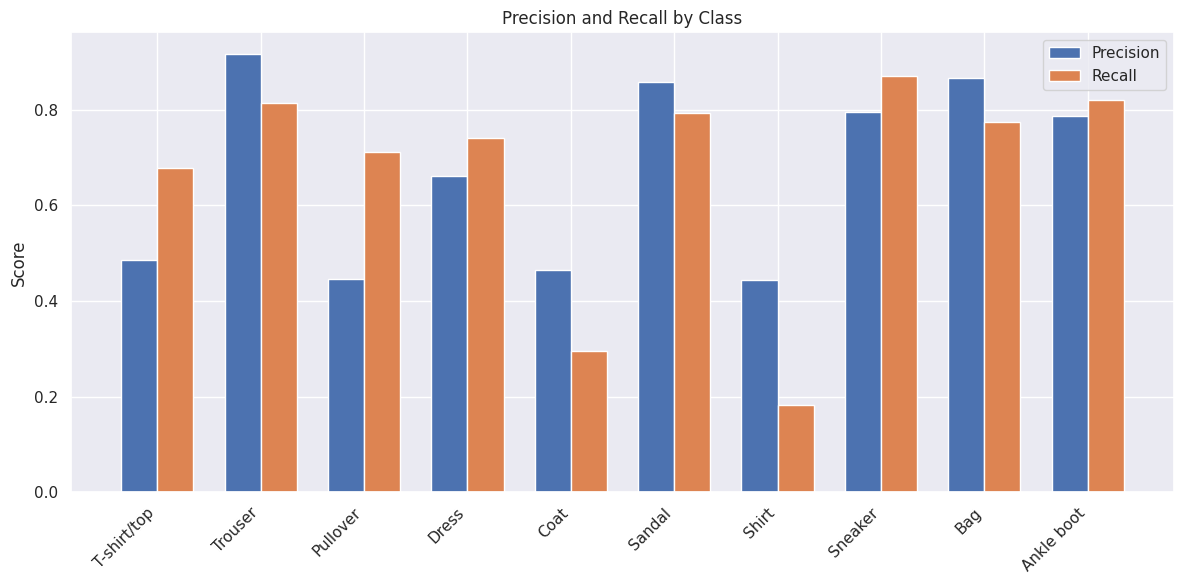

In [45]:
precisions, recalls = get_class_specific_prec_recall(cm)

labels = fmnist_class_names
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, precisions, width, label='Precision')
rects2 = ax.bar(x + width/2, recalls, width, label='Recall')

ax.set_ylabel('Score')
ax.set_title('Precision and Recall by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

number of images per category:

In [39]:
import collections

train_label_counts = collections.Counter(train_labels)
test_label_counts = collections.Counter(test_labels)

print("Training set image counts per category:")
for label, count in train_label_counts.items():
    print(f"{fmnist_class_names[label]}: {count}")

print("\nTest set image counts per category:")
for label, count in test_label_counts.items():
    print(f"{fmnist_class_names[label]}: {count}")

Training set image counts per category:
Ankle boot: 6000
T-shirt/top: 6000
Dress: 6000
Pullover: 6000
Sneaker: 6000
Sandal: 6000
Trouser: 6000
Shirt: 6000
Coat: 6000
Bag: 6000

Test set image counts per category:
Ankle boot: 1000
Pullover: 1000
Trouser: 1000
Shirt: 1000
Coat: 1000
Sandal: 1000
Sneaker: 1000
Dress: 1000
Bag: 1000
T-shirt/top: 1000


### Reflections on exercise 2:

1. Do you think that improving the model (making it more complex) we can improve the accuracy ?
2. Do you think that improving the dimension of the training set we can improve the accuracy ?
3. Do you think that changing the features (feature engineering we can improve the accuracy) ? Shirt vs T-shirt/top